# Import dataset

In [1]:
import pycaret
import pandas as pd
print(pd.__version__)
print(pycaret.__version__)

2.1.4
3.3.2


In [2]:
import pandas as pd
data = pd.read_csv('02_mushroom_species_data.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


## Setup

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   int64 
 5   odor                      8124 non-null   object
 6   gill-attached             8124 non-null   int64 
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
import mlflow
mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [9]:
# import pycaret classification and init setup

cat_cols = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attached', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-type', 'spore-print-color', 'population', 'habitat']
num_cols = ['ring-number']

from pycaret.classification import *
s = setup(data, target = 'class', session_id = 123, 
          categorical_features = cat_cols, 
          numeric_features = num_cols, 
          categorical_imputation='drop', # to remove columns with empty values for habitat
          log_experiment = True, 
          experiment_name = 'mushroom'
         )

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Binary
3,Target mapping,"edible: 0, poisonous: 1"
4,Original data shape,"(8124, 22)"
5,Transformed data shape,"(7932, 105)"
6,Transformed train set shape,"(5554, 105)"
7,Transformed test set shape,"(2378, 105)"
8,Numeric features,1
9,Categorical features,20


In [10]:
get_config('X_train_transformed').head()

,cap-shape_flat,cap-shape_convex,cap-shape_knobbed,cap-shape_bell,cap-shape_sunken,cap-shape_conical,cap-surface_smooth,cap-surface_scaly,cap-surface_fibrous,cap-surface_grooves,...,population_solitary,population_numerous,population_clustered,population_abundant,habitat_grasses,habitat_woods,habitat_path,habitat_meadows,habitat_leaves,habitat_urban
1287,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6411,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4564,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3565,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3892,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1840
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2550
qda,Quadratic Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1580
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2800
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2610
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2680
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2450
lr,Logistic Regression,0.9998,1.0000,0.9998,0.9998,0.9998,0.9996,0.9996,0.9150
dt,Decision Tree Classifier,0.9998,0.9998,0.9998,0.9998,0.9998,0.9996,0.9996,0.1570
svm,SVM - Linear Kernel,0.9998,1.0000,0.9998,0.9998,0.9998,0.9996,0.9996,0.1590


2024/08/17 23:20:25 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/17 23:20:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run K Neighbors Classifier at: http://127.0.0.1:5000/#/experiments/831693794823680582/runs/586ed003db8f486ba4cf255477c14af1.
2024/08/17 23:20:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/831693794823680582.
2024/08/17 23:20:26 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/17 23:20:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest Classifier at: http://127.0.0.1:5000/#/experiments/831693794823680582/runs/c45bf5ae566c4161a9d4790ef91eb12d.
2024/08/17 23:20:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/ex

## Analyze Model

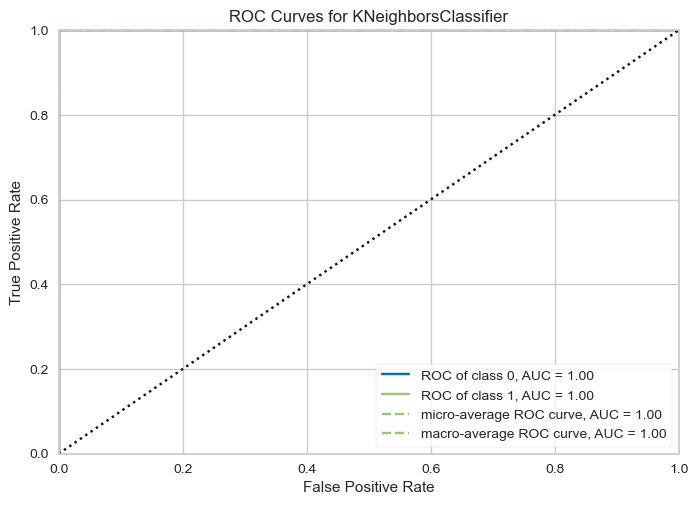

In [12]:
# plot AUC
plot_model(best, plot = 'auc')

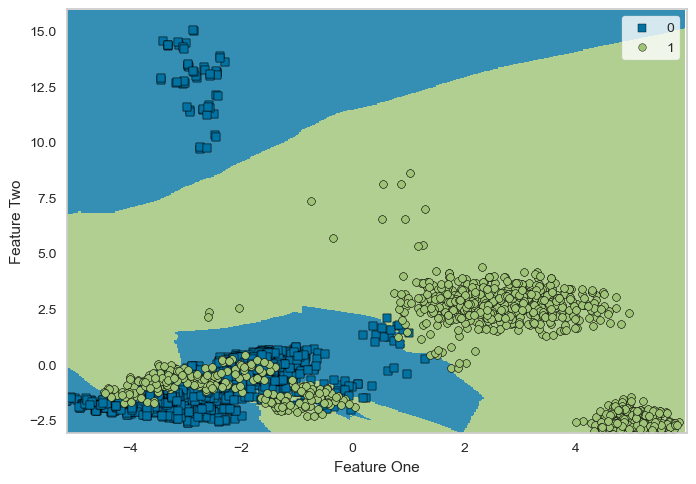

In [13]:
plot_model(best, plot = 'boundary')

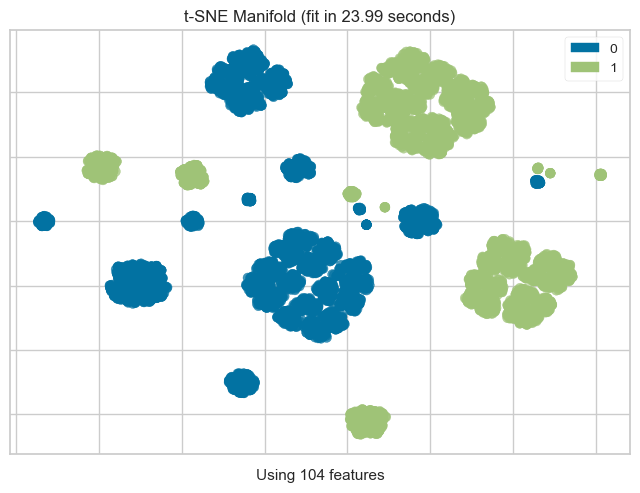

In [14]:
plot_model(best, plot = 'manifold')

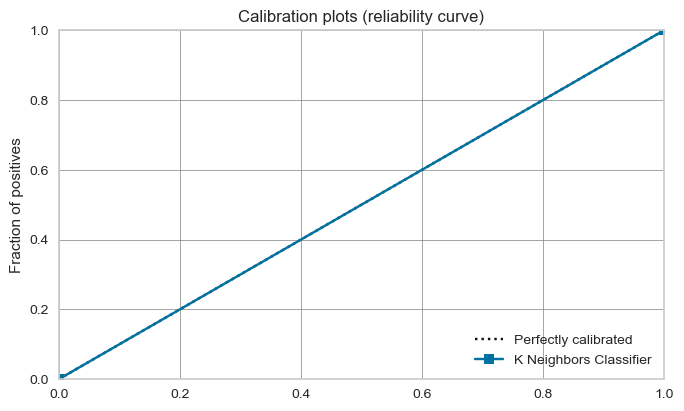

In [15]:
# check calbiration of calibrated dt
plot_model(best, plot = 'calibration')

In [16]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Predictions

In [17]:
test_combined = pd.concat([get_config('X_test'), get_config('y_test')], axis=1)
test_combined.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attached,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
3370,flat,scaly,brown,1,none,0,close,broad,white,tapering,...,smooth,white,gray,white,1,pendant,black,several,woods,edible
4466,flat,fibrous,gray,0,foul,0,close,broad,chocolate,enlarging,...,silky,buff,pink,white,1,large,chocolate,solitary,grasses,poisonous
4232,flat,smooth,white,1,foul,0,close,broad,pink,tapering,...,fibrous,white,white,white,1,pendant,chocolate,scattered,urban,poisonous
5058,convex,smooth,buff,1,foul,0,close,broad,white,tapering,...,fibrous,white,white,white,1,pendant,chocolate,scattered,urban,poisonous
6305,convex,smooth,red,0,foul,0,close,narrow,buff,tapering,...,smooth,pink,pink,white,1,evanescent,white,several,path,poisonous


In [18]:
predictions = predict_model(best, data=test_combined)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attached,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class,prediction_label,prediction_score
3370,flat,scaly,brown,1,none,0,close,broad,white,tapering,...,gray,white,1,pendant,black,several,woods,edible,edible,1.0
4466,flat,fibrous,gray,0,foul,0,close,broad,chocolate,enlarging,...,pink,white,1,large,chocolate,solitary,grasses,poisonous,poisonous,1.0
4232,flat,smooth,white,1,foul,0,close,broad,pink,tapering,...,white,white,1,pendant,chocolate,scattered,urban,poisonous,poisonous,1.0
5058,convex,smooth,buff,1,foul,0,close,broad,white,tapering,...,white,white,1,pendant,chocolate,scattered,urban,poisonous,poisonous,1.0
6305,convex,smooth,red,0,foul,0,close,narrow,buff,tapering,...,pink,white,1,evanescent,white,several,path,poisonous,poisonous,1.0


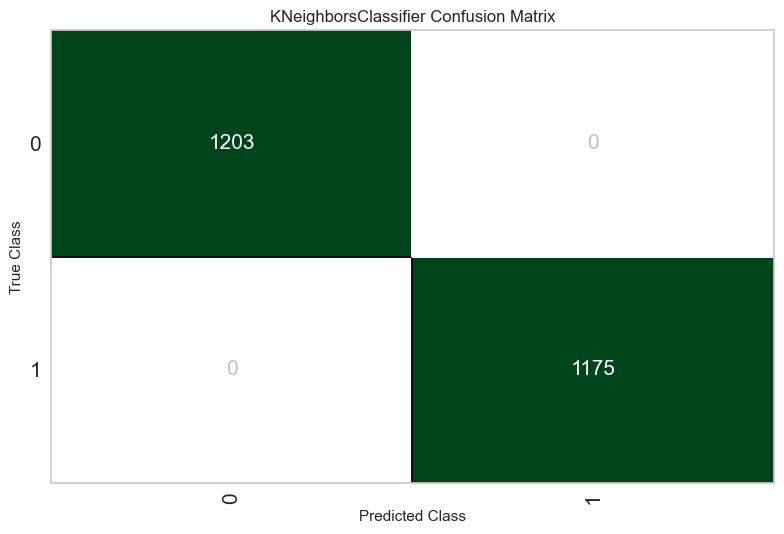

In [19]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

___

## Save Model

In [20]:
# finalize the model
final_best = finalize_model(best)

save_model(final_best, 'mushroom-pipeline')

2024/08/17 23:21:20 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/17 23:21:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run K Neighbors Classifier at: http://127.0.0.1:5000/#/experiments/831693794823680582/runs/86c845b86c0044279425a8151f7dab25.
2024/08/17 23:21:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/831693794823680582.


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['ring-number'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy...
                                                               return_df=True,
                                                               use_cat_names=True,
       

In [21]:
# load pipeline
loaded_best_pipeline = load_model('mushroom-pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\Amber\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=['ring-number'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_fe...
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

# Consume model with MLFlow

In [23]:
import mlflow

#Replace with your run id from mlflow localhost website
logged_model = 'runs:/f71ba72847f145a49a09fe381d9d235e/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)